In [1]:
import pandas as pd 
insurance_data = pd.read_csv('insurance.csv');

In [2]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,middle,16884.92400
1,18,male,33.770,1,no,south,1725.55230
2,28,male,33.000,3,no,south,4449.46200
3,33,male,22.705,0,no,north,21984.47061
4,32,male,28.880,0,no,north,3866.85520


To show the statistic description of Insurance data set

In [3]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Answer for Q1 

The mean value of charges in insuarance data set

In [4]:
mean = insurance_data.charges.mean()
print("Mean of the charge is", mean);

Mean of the charge is 13270.422265141257


# #Answer for Q1 

The variance value of charges in insuarance data set

In [5]:
variance = (insurance_data.charges.std())**2
print("Variance of the charge is ",variance);

Variance of the charge is  146652372.1528548


To encode string value for sex smoker and region features

In [21]:
from sklearn.preprocessing import LabelEncoder
df = insurance_data.copy()

le_encoders = {}
for column in df.columns:
  if df[column].dtype == type(object):
    le = LabelEncoder()
    le_encoders[column] = le
    df[column] = le.fit_transform(df[column])

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# # Answer for Q1 

The graph illustrate that the charges in insurance data set is left screw, not normal distrubution

In [8]:
import seaborn as sns
import numpy as np 
from matplotlib import pyplot as plt
df = insurance_data.copy()
fi= plt.figure(figsize=(14,5))

axis=fi.add_subplot(121)
sns.distplot(df.charges)
axis.set_title('The distribution of charges')

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'The distribution of charges')

# # Answer for Q2 

 the heatmap illustrate the correlation between two variable. Following the map visualisation, the smoker feature has the most influence on charges due to the red level in box showing the positive correlation along with having the value closet to 1 between two variables.

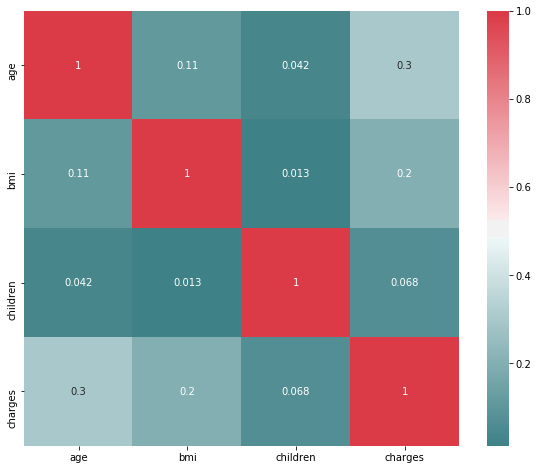

In [9]:
import seaborn as sns
import numpy as np

fi, axis = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True), square=True, ax=axis)

# #Answer for Q3
On the source code below, there are three models  which are used to classify and predict data including Linear Regression, Lasso, and BayesianRidge. After fit model and predict each classified data, the error mean result indicates that Train usually has the  value fewer than Test and Valid due to each prediction in train  test and valid compared to train in which the data has been input to the model. 

Moreover, the error  mean can shows the precision of each model. In case that the mean value has lesser  value, the model is more precise. On the other hand, if the mean value has more value, the model is more inprecisive.



# Linear Regression

In [30]:
from sklearn.model_selection import train_test_split

X= df.drop('charges', axis=1)

Y = df['charges']

X_train, X_rest, Y_train, Y_rest = train_test_split( X, Y, test_size=0.20)
X_valid, X_test, Y_valid, Y_test = train_test_split(  X_rest, Y_rest, test_size=0.50)

print('Training shape: ', X_train.shape, Y_train.shape)
print('Valid shape: ', X_valid.shape, Y_valid.shape)
print('Test shape: ', X_test.shape, Y_test.shape)

Training shape:  (1070, 6) (1070,)
Valid shape:  (134, 6) (134,)
Test shape:  (134, 6) (134,)


In [39]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, Y_train)
predictions_train= linear.predict(X_train)
predictions_test = linear.predict(X_test)
predictions_valid = linear.predict(X_valid)
print(predictions_train)
print(predictions_test)
print(predictions_valid)

[ 8099.96559861   328.68577121  5150.53763764 ...  9606.27717199
 11202.75622905 24336.35511798]
[10670.49217841  3797.35094141   878.03155012  9178.20631014
  9999.93721233  4347.31266958 16006.66251929 13548.36973971
 10061.00374318  5786.66190775  3613.17575929  4643.47202387
 11689.69489096  2321.44285846 36864.81422752  5432.74290443
  2829.78767391 13934.91754539 15688.10000658 34399.70362788
 13798.17139516 10760.21438464 11883.15685089  5826.53201253
  7603.88034424  9002.61351902 13607.98482349 32378.33092753
  9619.22089933  4340.15794588  6064.82201886  3000.77794042
 10206.19499724  5624.23522988  2285.99449692  9864.88218936
  7369.1820585   9915.00413943 33674.60210305 11662.3556141
 26413.59134208  2141.72806365 13560.1497247   8984.50215534
  3355.56809756   203.30488046  9175.53370705 29268.27335978
  4160.31263609 13750.80037617 10883.22924437 36171.14497678
  6907.85570722  9892.47433857 11192.45565771 14946.11655434
 33945.23229351  9656.25065644  9526.23814011 2773

Error Mean  value of Linear Regression

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error of train split:" , mean_squared_error( predictions_train,Y_train))
print("Mean squared error of test split:" , mean_squared_error( predictions_test,Y_test))
print("Mean squared error of valid split:" , mean_squared_error( predictions_valid,Y_valid))

Mean squared error of train split: 36220659.4766956
Mean squared error of test split: 38421786.803385824
Mean squared error of valid split: 38888779.361628145


# Lasso

In [33]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(X_train,Y_train)
Lasso_predictions_train= Lasso.predict(X_train)
Lasso_predictions_test = Lasso.predict(X_test)
Lasso_predictions_valid = Lasso.predict(X_valid)
print(predictions_train)
print(predictions_test)
print(predictions_valid)

[ 8099.96559861   328.68577121  5150.53763764 ...  9606.27717199
 11202.75622905 24336.35511798]
[10670.49217841  3797.35094141   878.03155012  9178.20631014
  9999.93721233  4347.31266958 16006.66251929 13548.36973971
 10061.00374318  5786.66190775  3613.17575929  4643.47202387
 11689.69489096  2321.44285846 36864.81422752  5432.74290443
  2829.78767391 13934.91754539 15688.10000658 34399.70362788
 13798.17139516 10760.21438464 11883.15685089  5826.53201253
  7603.88034424  9002.61351902 13607.98482349 32378.33092753
  9619.22089933  4340.15794588  6064.82201886  3000.77794042
 10206.19499724  5624.23522988  2285.99449692  9864.88218936
  7369.1820585   9915.00413943 33674.60210305 11662.3556141
 26413.59134208  2141.72806365 13560.1497247   8984.50215534
  3355.56809756   203.30488046  9175.53370705 29268.27335978
  4160.31263609 13750.80037617 10883.22924437 36171.14497678
  6907.85570722  9892.47433857 11192.45565771 14946.11655434
 33945.23229351  9656.25065644  9526.23814011 2773

Error Mean value of Linear Regression

In [34]:
print("Mean squared error of traint split:" , mean_squared_error( Lasso_predictions_train,Y_train))
print("Mean squared error of test split:" , mean_squared_error( Lasso_predictions_test,Y_test))
print("Mean squared error of valid split:" , mean_squared_error( Lasso_predictions_valid,Y_valid))

Mean squared error of traint split: 36220672.364826195
Mean squared error of test split: 38421972.73432517
Mean squared error of valid split: 38887693.636399984


# BayesianRidge

In [41]:
from sklearn.linear_model import BayesianRidge
BayesianRidge= BayesianRidge()
BayesianRidge.fit(X_train,Y_train)
BayesianRidge_predictions_train= BayesianRidge.predict(X_train)
BayesianRidge_predictions_test = BayesianRidge.predict(X_test)
BayesianRidge_predictions_valid = BayesianRidge.predict(X_valid)
print(BayesianRidge_predictions_train)
print(BayesianRidge_predictions_test)
print(BayesianRidge_predictions_valid)

[ 8106.27027283   341.61928098  5162.14635099 ...  9615.38352043
 11216.50545985 24290.99134979]
[10682.4071429   3807.10741818   890.45827505  9185.51274475
 10006.45835072  4359.96272102 16016.5160188  13558.7954837
 10067.67394912  5795.44676745  3619.7636897   4655.57426188
 11702.42172848  2331.19601254 36824.36133906  5444.76950107
  2838.37596747 13949.48431835 15698.12412141 34356.87388011
 13805.85426298 10772.99380676 11897.07497034  5838.81371146
  7616.62132624  9012.2914729  13616.81107601 32330.60365564
  9631.24589044  4347.81001565  6074.80013677  3011.93302891
 10217.70507763  5636.07765946  2298.79393696  9876.01584471
  7383.74371845  9928.23978222 33627.91138295 11676.51120235
 26372.21130544  2152.57353315 13567.90724246  9001.07838441
  3370.67935949   216.75750748  9183.90179641 29223.86279802
  4171.314449   13758.30696059 10895.0240845  36128.6273902
  6919.25144953  9898.93361007 11201.12396709 14954.14452803
 33905.00120853  9666.2455725   9531.59278223 27687

Error Mean value of BaysianRidge

In [42]:
print("Mean squared error of traint split:" , mean_squared_error( BayesianRidge_predictions_train,Y_train))
print("Mean squared error of test split:" , mean_squared_error( BayesianRidge_predictions_test,Y_test))
print("Mean squared error of valid split:" , mean_squared_error( BayesianRidge_predictions_valid,Y_valid))

Mean squared error of traint split: 36221130.20604428
Mean squared error of test split: 38412816.93758844
Mean squared error of valid split: 38906497.662181
